In [ ]:
# Selected 9AM due to high activity in this time zone (heatmap in official paper)

In [19]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
def count_blocks(data):
    block_counter_dict = {}
    for row in data.itertuples():

        # taking block size = 4KB
        block_index = int(row.Offset / 4096)

        # using offset iterate over the next blocks
        next_blocks_count = int(row.Size / 4096)

        # Incrememnt next blocks counter
        for i in range(0, next_blocks_count):

            if (block_index+i in block_counter_dict):
                block_counter_dict[block_index+i] += 1
            else:
                block_counter_dict[block_index+i] = 1
    return block_counter_dict


In [2]:
def ecdf(data, len_block_counter_dict):
    """ Compute ECDF """
#     x = np.sort(data)
    n = len(data)
#     y = np.arange(1, data) / n

    cumsum = 0
    y = []
    for i in range(len(data)):
        cumsum += data[i]
        y.append(round(cumsum/len_block_counter_dict, 3))

    return y


# 9AM VDI Trace (LUN0)

In [7]:

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022209-LUN0.csv')
# data.head()
data.shape

(3085094, 6)

In [8]:
df2 = pd.DataFrame()
df2[['Offset', 'Size']] = data[['Offset', 'Size']]
df2.shape




(3085094, 2)

In [9]:
df2.to_csv (r'export_dataframe.csv')


In [86]:
# PART 1 - All Access

block_counter_dict = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict))
print ("Sum of all the block accesses", sum(block_counter_dict.values()))
# print (block_counter_dict)


# for key in sorted(block_counter_dict):
#     print ("%s: %s" % (key, block_counter_dict[key]))

sorted_block_counter_dict = collections.OrderedDict(sorted(block_counter_dict.items()))
# print(sorted_block_counter_dict)

# print(sorted(block_counter_dict.values(), reverse=True))

Number of blocks accessed 16796116
Sum of all the block accesses 23876654


In [87]:
# df = pd.DataFrame(sorted_block_counter_dict, index=[1])
# df = pd.DataFrame.from_dict(sorted_block_counter_dict.items(), orient='index')
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict, orient='index')

print(sorted_df)

            0
33049       4
33120       1
33121       1
33122       1
33123       1
...        ..
1241814803  1
1241814804  1
1241814805  1
1241814806  1
1241818556  1

[16796116 rows x 1 columns]


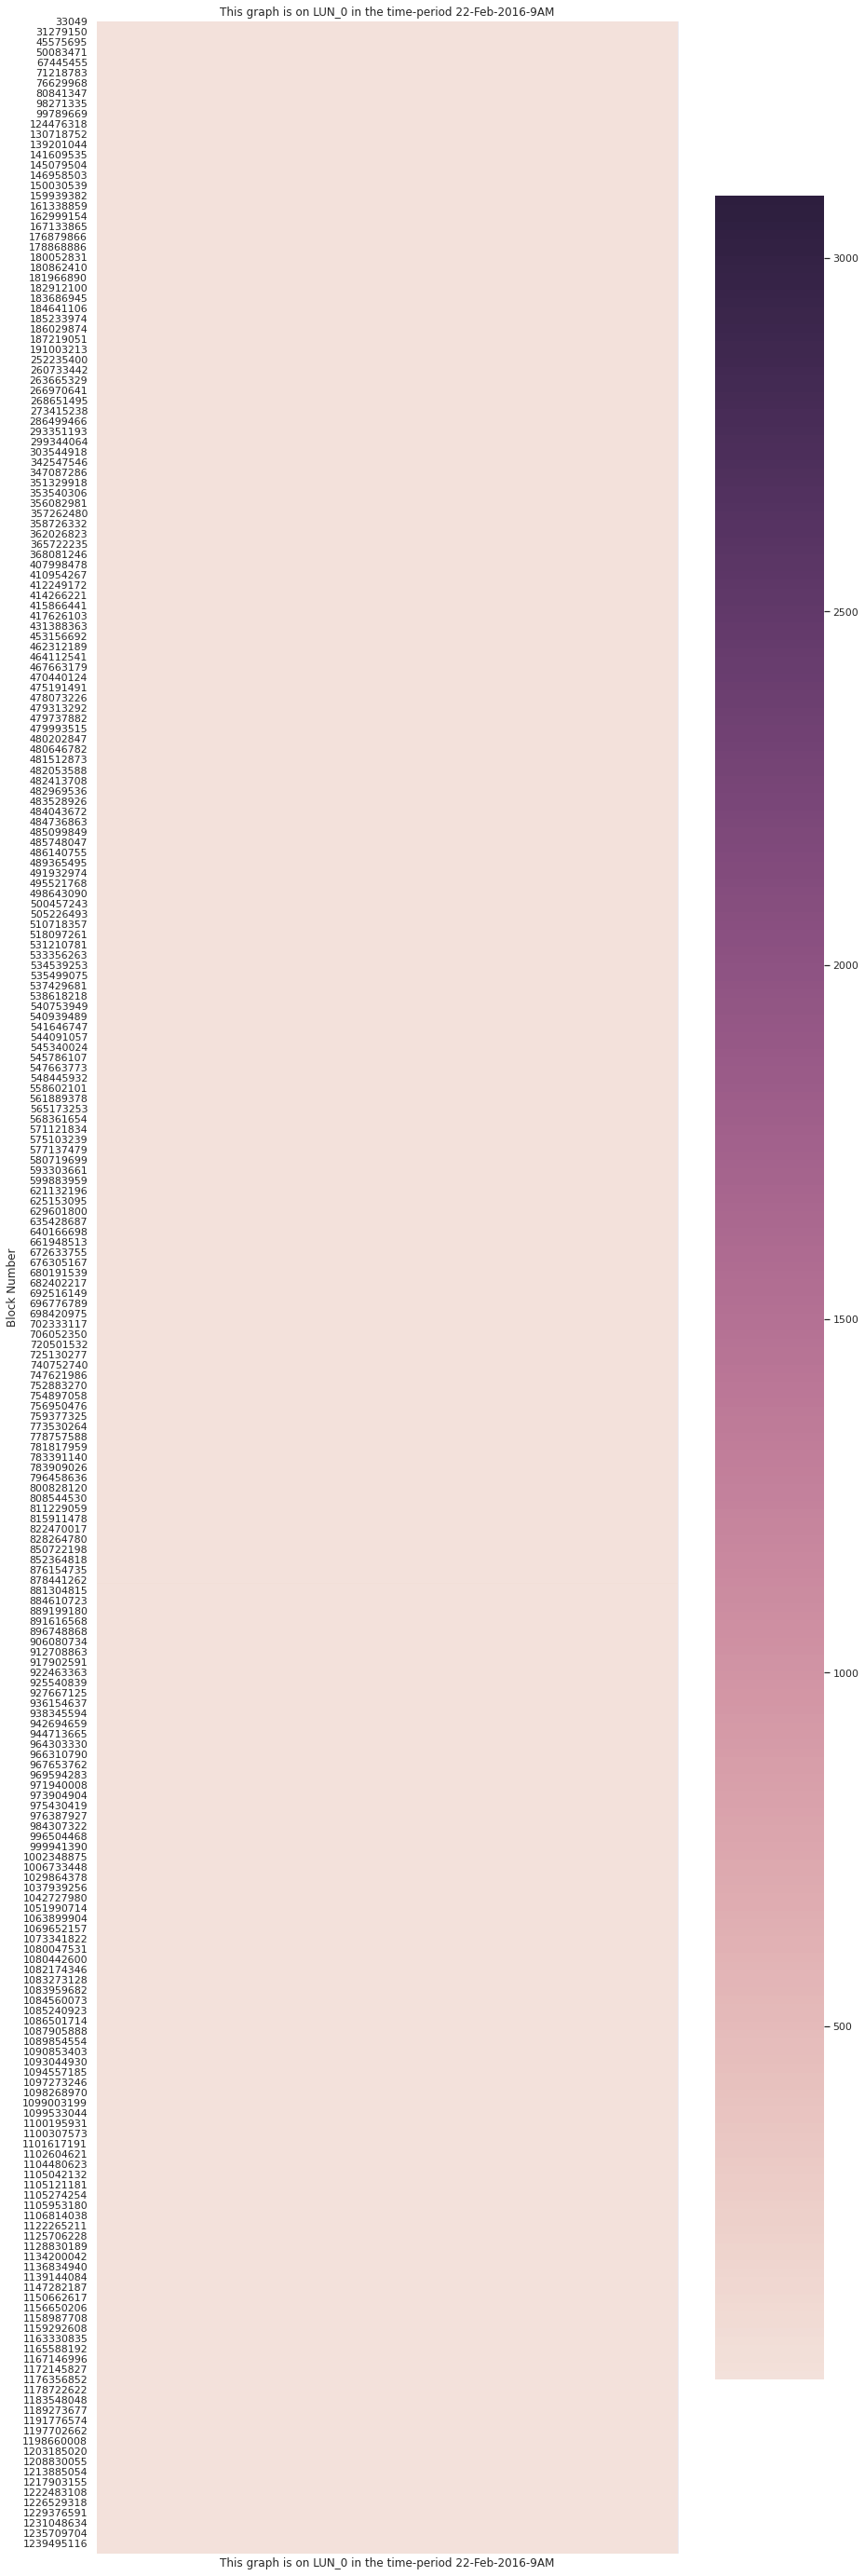

In [88]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-9AM')
plt.show()

In [89]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.647


block_range_2000_plus 6
block_range_1000_2000 16
block_range_500_1000 34
block_range_100_500 1354
block_range_50_100 3764
block_range_10_50 20686
block_range_2_10 4327155
block_range_1 12443101
block_range_0 1225022440


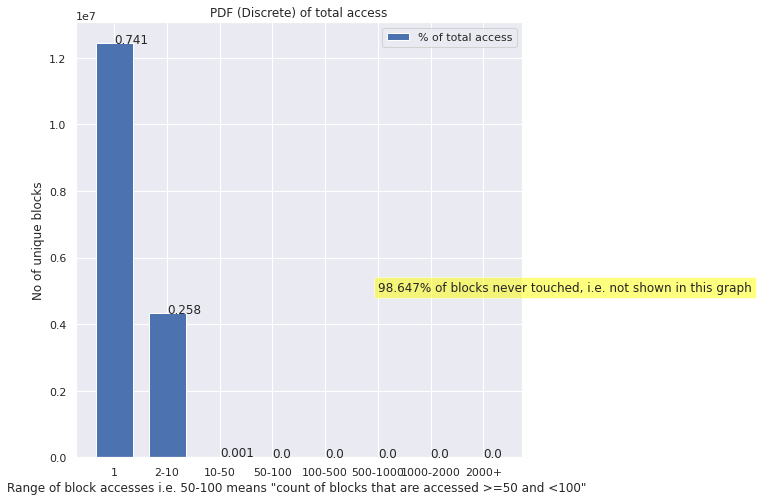

In [90]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 5000000, "98.647% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict), 3)), xy=(x_axis[i], y_axis[i]))



Text(4, 0.9, '98.647% of blocks never touched, i.e. not shown in this graph')

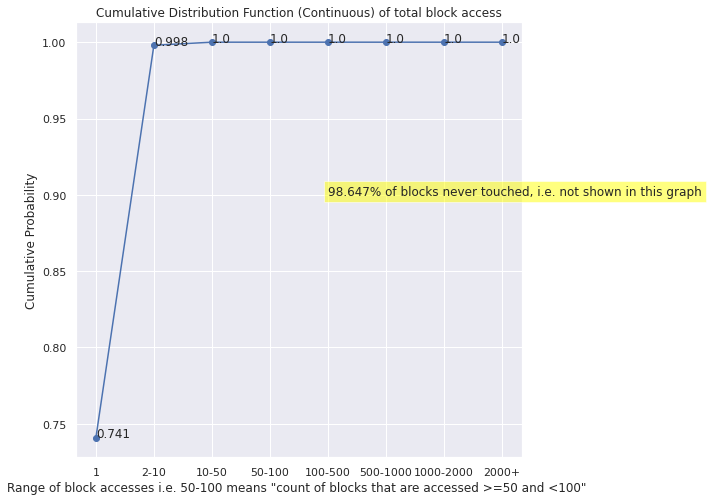

In [92]:

import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict))




pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.647% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))




# 9AM VDI Trace (LUN1)

In [13]:

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022209-LUN1.csv')
data.head()
data.shape

(3613282, 6)

In [12]:
df2 = pd.DataFrame()
df2[['Offset', 'Size']] = data[['Offset', 'Size']]
df2.shape




(3613282, 2)

In [14]:
df2.to_csv (r'export_dataframe2.csv')


In [97]:
# PART 1 - All Access

block_counter_dict_2 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_2))
print ("Sum of all the block accesses", sum(block_counter_dict_2.values()))

sorted_block_counter_dict_2 = collections.OrderedDict(sorted(block_counter_dict_2.items()))


Number of blocks accessed 21516377
Sum of all the block accesses 30219696


In [98]:

sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_2, orient='index')

print(sorted_df)

             0
33049       10
56621        1
56747        1
56748        1
101951       1
...         ..
1158464083   1
1158464084   1
1158464085   1
1158464086   1
1158464087   1

[21516377 rows x 1 columns]


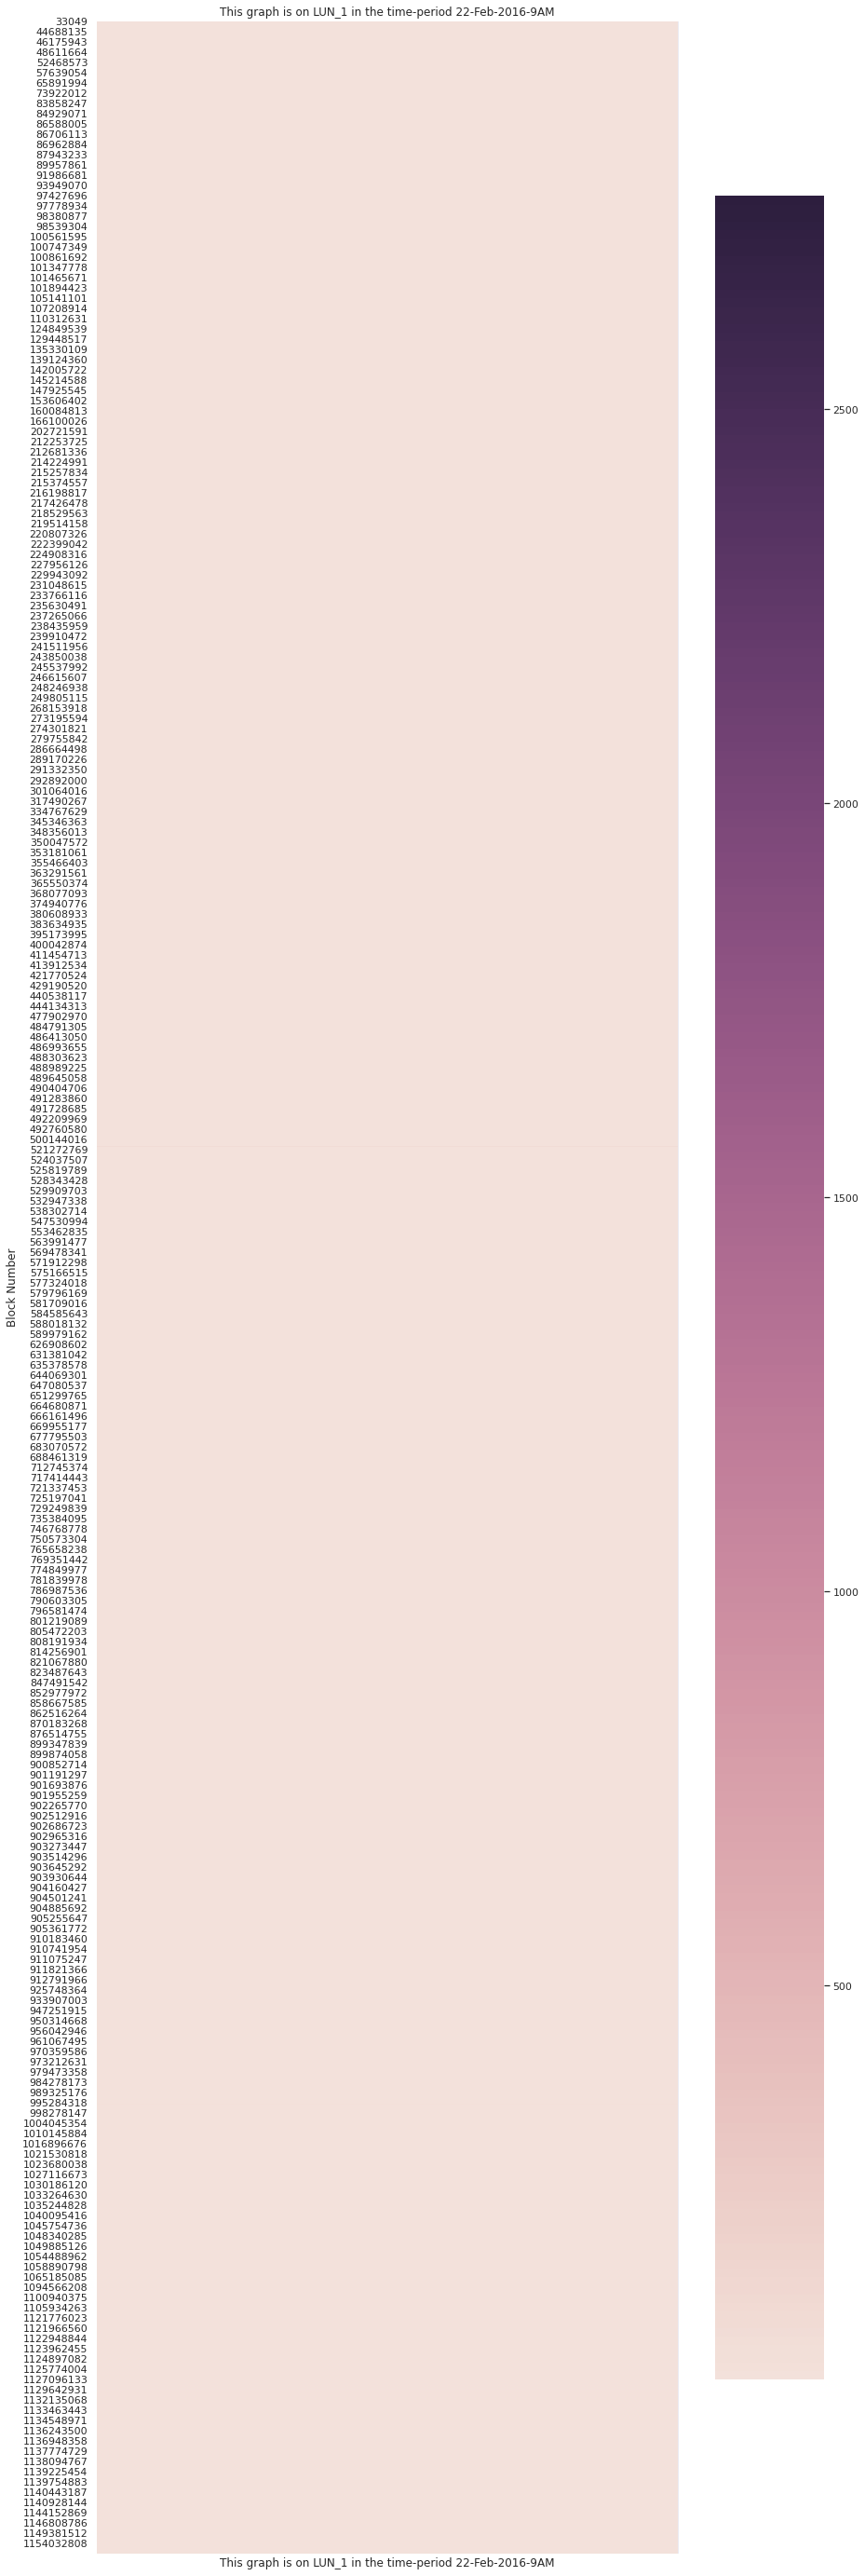

In [99]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_1 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_1 in the time-period 22-Feb-2016-9AM')
plt.show()

In [100]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_2.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_2)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_2)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.142


block_range_2000_plus 10
block_range_1000_2000 8
block_range_500_1000 34
block_range_100_500 1232
block_range_50_100 3927
block_range_10_50 27320
block_range_2_10 5190779
block_range_1 16293067
block_range_0 1136947710


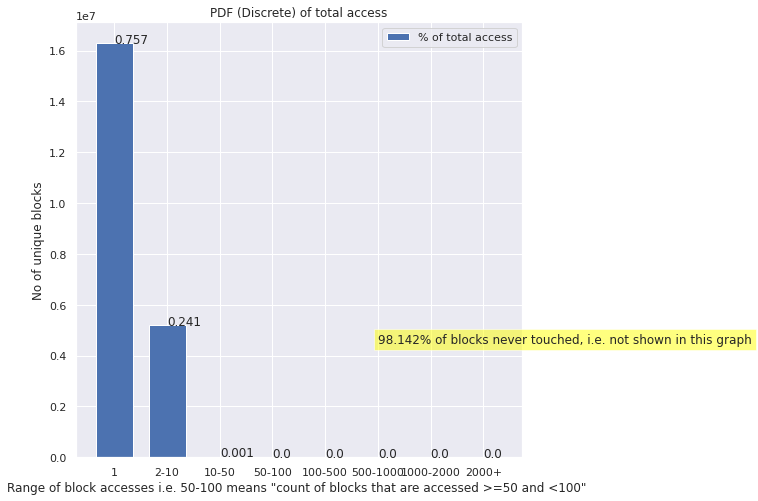

In [101]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.142% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_2), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.142% of blocks never touched, i.e. not shown in this graph')

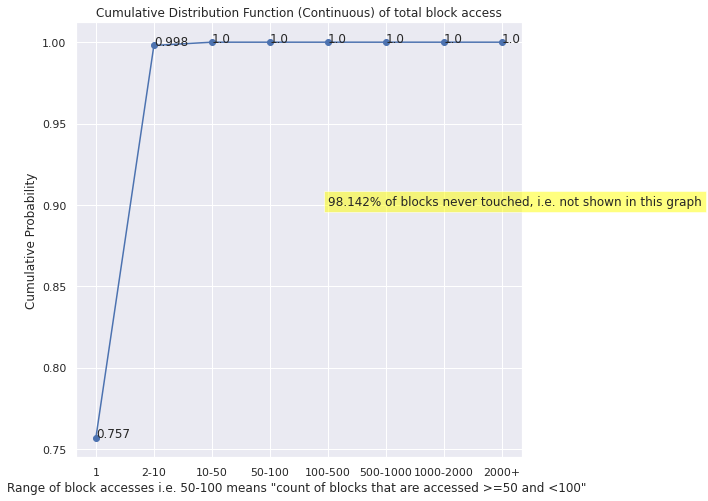

In [102]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_2))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.142% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))



# 9AM VDI Trace (LUN2)

In [20]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022209-LUN2.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456099e+09,0.000387,R,2,4439589032960,16384
1,1.456099e+09,0.000747,R,2,4439588721664,77824
2,1.456099e+09,0.000221,R,2,4439589053440,8192
3,1.456099e+09,0.000203,R,2,778716834816,4096
4,1.456099e+09,0.000151,R,2,778716232192,4096


In [17]:
df2 = pd.DataFrame()
df2[['Offset', 'Size']] = data[['Offset', 'Size']]
df2.shape




(4711988, 2)

In [18]:
df2.to_csv (r'export_dataframe3.csv')


In [19]:
nd = pd.read_csv('export_dataframe3.csv')
nd.head()

,Unnamed: 0,Offset,Size
0,0,4439589032960,16384
1,1,4439588721664,77824
2,2,4439589053440,8192
3,3,778716834816,4096
4,4,778716232192,4096


In [108]:
# PART 1 - All Access

block_counter_dict_3 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_3))
print ("Sum of all the block accesses", sum(block_counter_dict_3.values()))

sorted_block_counter_dict_3 = collections.OrderedDict(sorted(block_counter_dict_3.items()))


Number of blocks accessed 21420234
Sum of all the block accesses 31868961


In [109]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_3, orient='index')

print(sorted_df)

             0
33049       14
33050        1
33051        1
33052        1
33053        1
...         ..
1302576848   2
1302576849   2
1302576850   2
1302577084   1
1302577192   1

[21420234 rows x 1 columns]


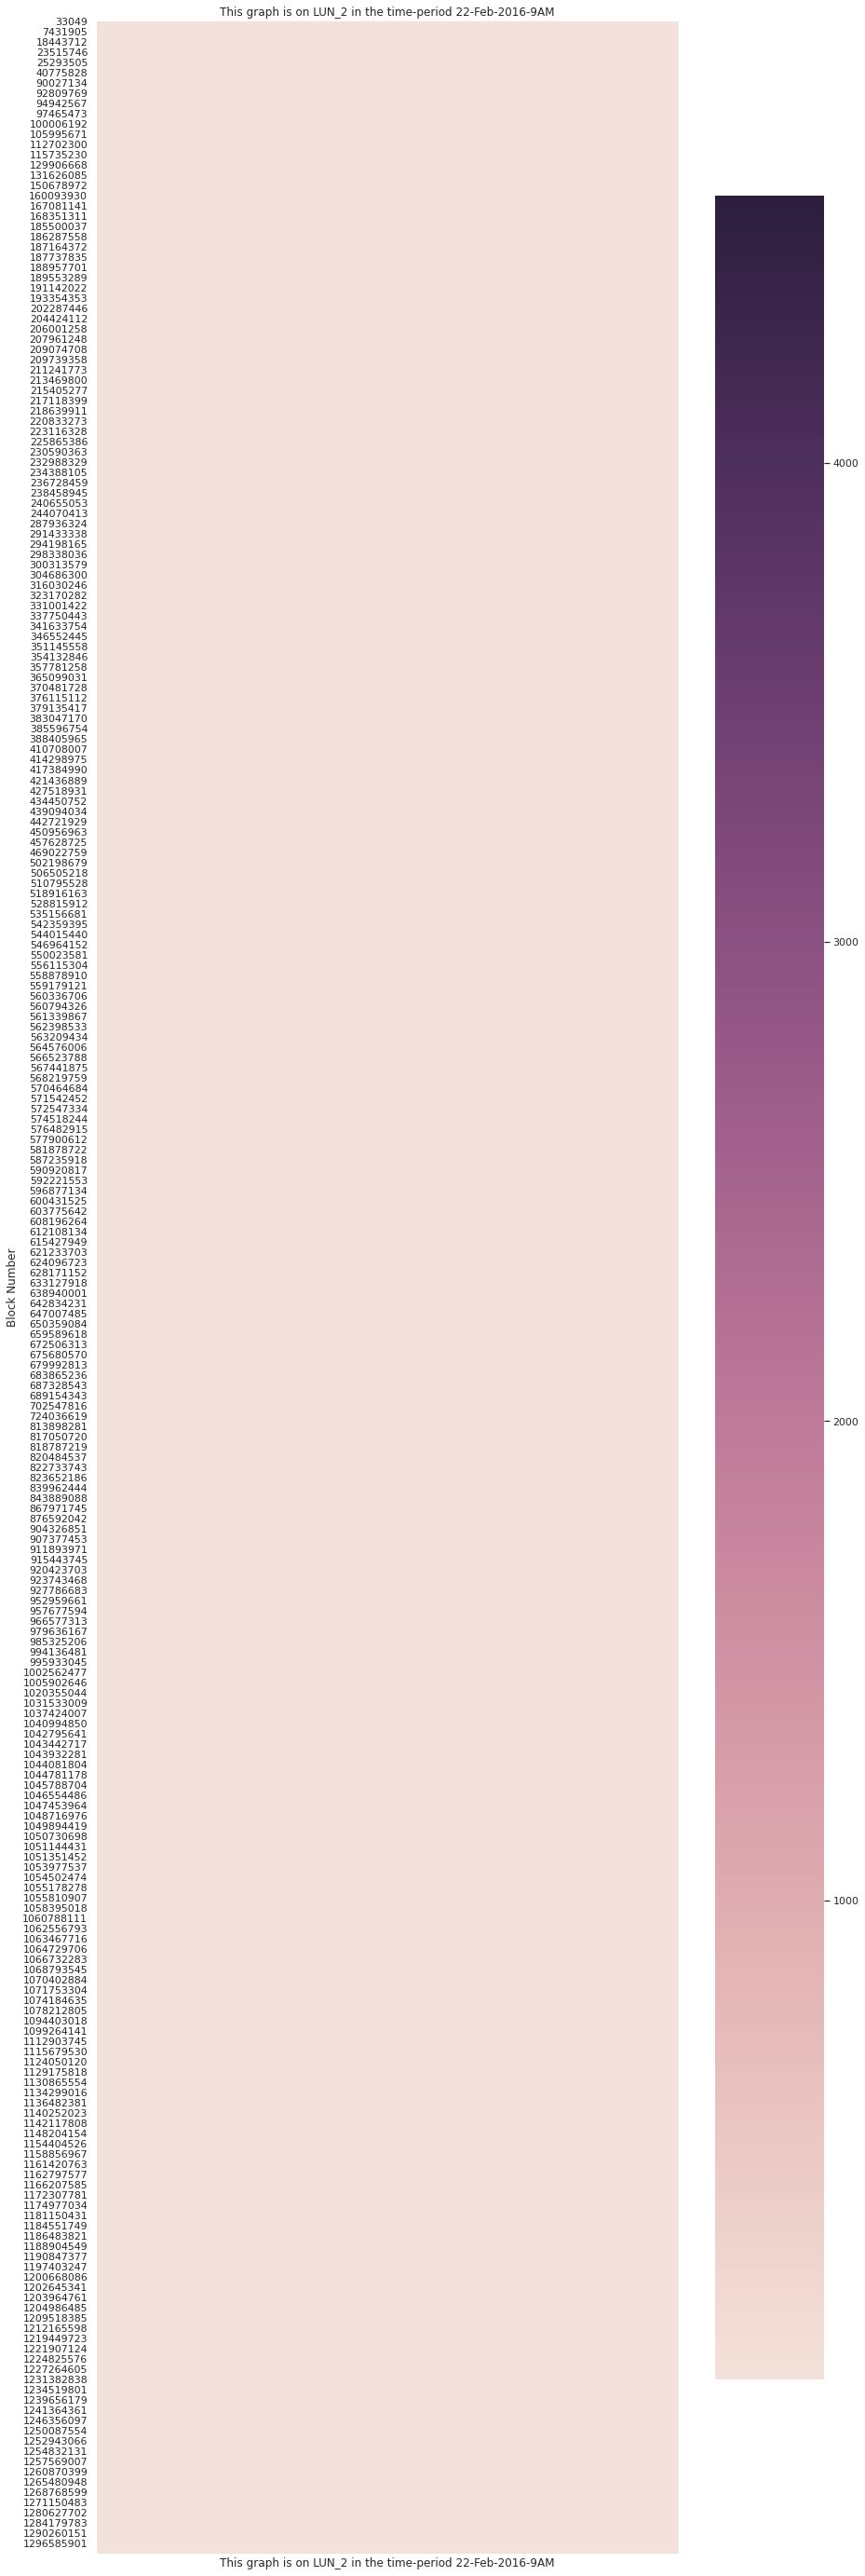

In [110]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_2 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_2 in the time-period 22-Feb-2016-9AM')
plt.show()

In [112]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_3.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_3)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_3)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)


#98.355

block_range_2000_plus 6
block_range_1000_2000 12
block_range_500_1000 32
block_range_100_500 996
block_range_50_100 4866
block_range_10_50 54136
block_range_2_10 5632511
block_range_1 15727675
block_range_0 1281156958


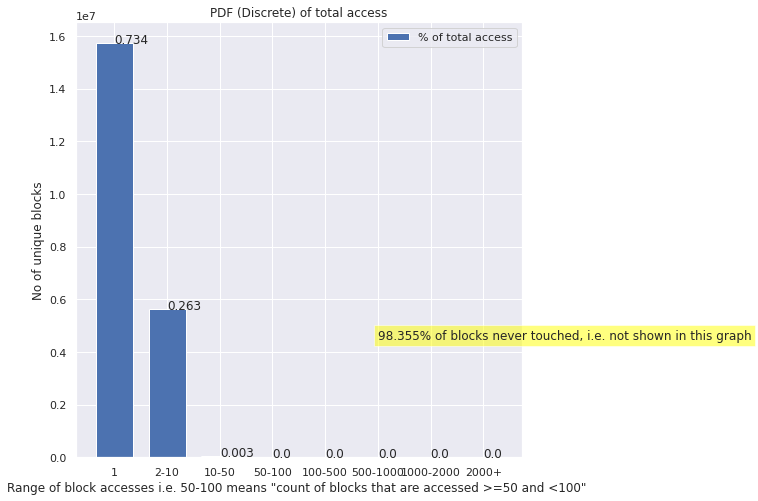

In [113]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.355% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_3), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.355% of blocks never touched, i.e. not shown in this graph')

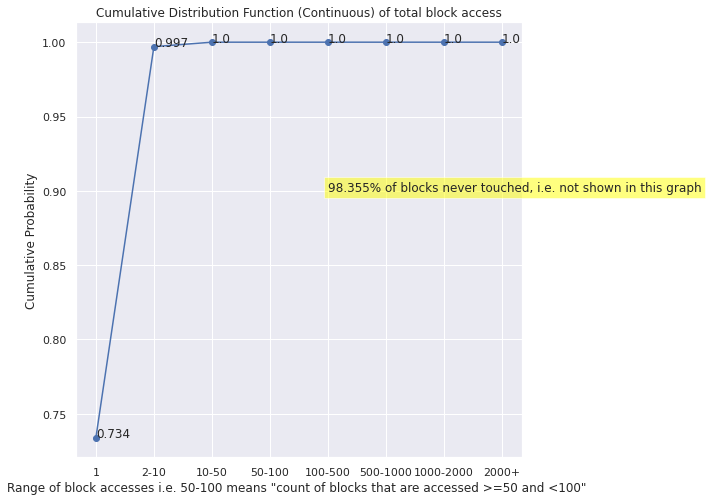

In [114]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_3))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.355% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 9AM VDI Trace (LUN3)

In [32]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022209-LUN3.csv')
# data.head()
data.shape

(3506508, 6)

In [33]:
df2 = pd.DataFrame()
df2[['Offset', 'Size']] = data[['Offset', 'Size']]
df2.shape




(3506508, 2)

In [34]:
df2.to_csv (r'export_dataframe4.csv')


In [4]:
# PART 1 - All Access

block_counter_dict_4 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_4))
print ("Sum of all the block accesses", sum(block_counter_dict_4.values()))

sorted_block_counter_dict_4 = collections.OrderedDict(sorted(block_counter_dict_4.items()))


Number of blocks accessed 20162778
Sum of all the block accesses 27336414


In [5]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_4, orient='index')

print(sorted_df)

             0
33049        8
33120       62
33121       62
76960        1
76961        1
...         ..
1052907850   2
1052907851   2
1052907852   2
1052907853   2
1052907854   2

[20162778 rows x 1 columns]


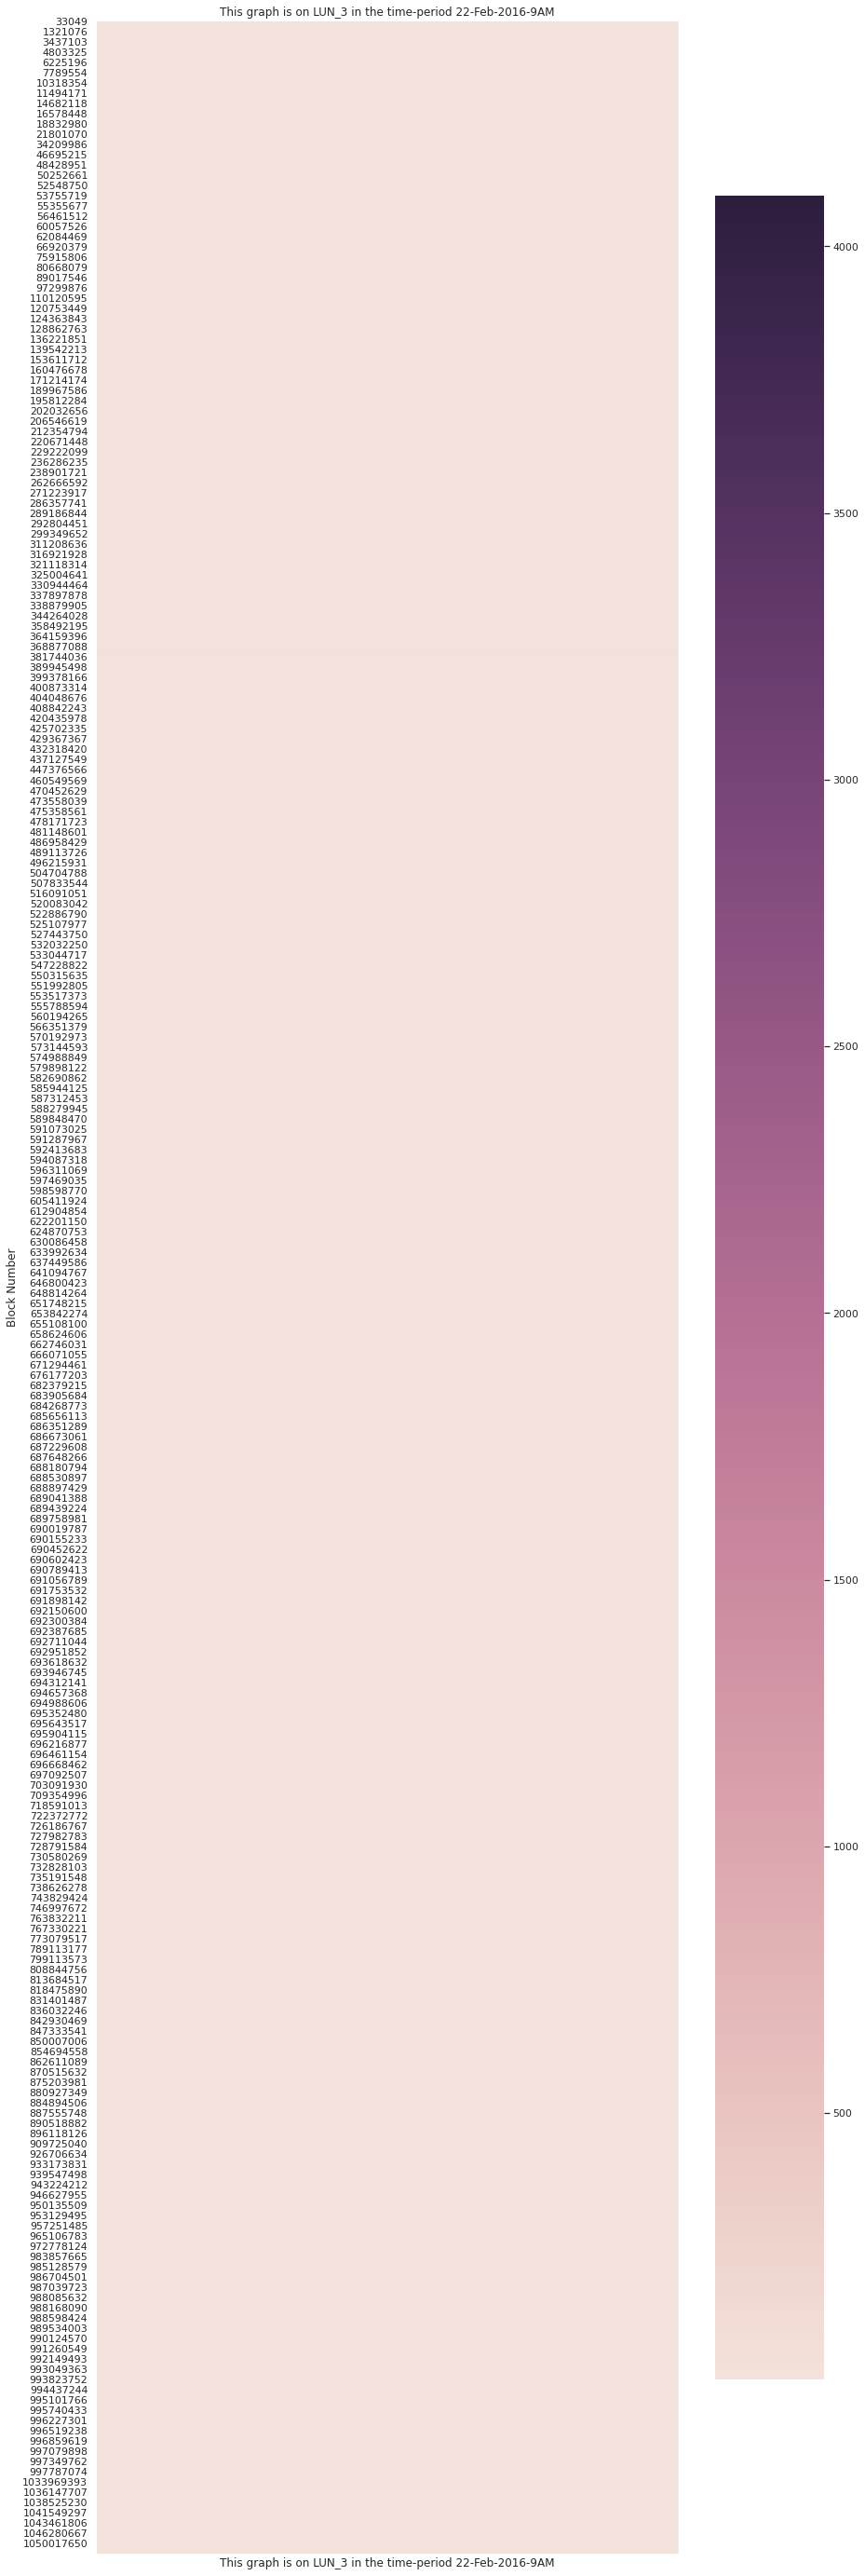

In [6]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_3 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_3 in the time-period 22-Feb-2016-9AM')
plt.show()

In [7]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_4.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_4)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_4)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#98.085


block_range_2000_plus 4
block_range_1000_2000 16
block_range_500_1000 55
block_range_100_500 1026
block_range_50_100 3676
block_range_10_50 35844
block_range_2_10 4430397
block_range_1 15691760
block_range_0 1032745076


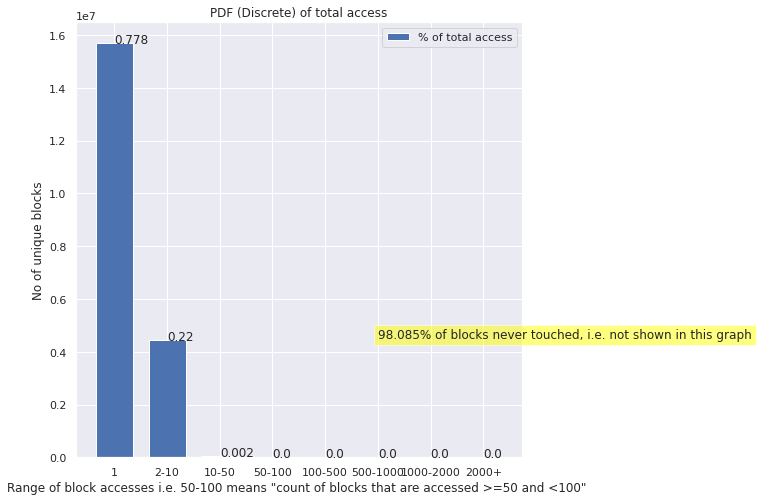

In [8]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "98.085% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_4), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '98.085% of blocks never touched, i.e. not shown in this graph')

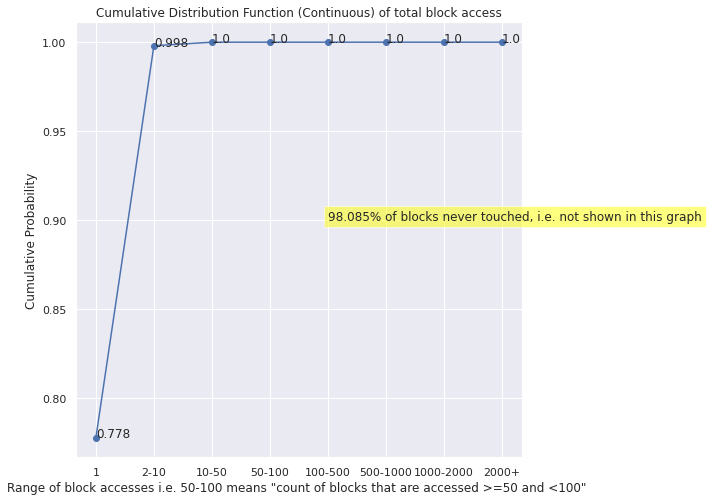

In [9]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_4))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "98.085% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 9AM VDI Trace (LUN4)

In [27]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022209-LUN4.csv')
# data.head()
data.shape

(4478456, 6)

In [28]:
df2 = pd.DataFrame()
df2[['Offset', 'Size']] = data[['Offset', 'Size']]
df2.shape




(4478456, 2)

In [30]:
df2.to_csv (r'export_dataframe5.csv')


In [4]:
block_counter_dict_5 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_5))
print ("Sum of all the block accesses", sum(block_counter_dict_5.values()))

sorted_block_counter_dict_5 = collections.OrderedDict(sorted(block_counter_dict_5.items()))


Number of blocks accessed 25538976
Sum of all the block accesses 35573749


In [5]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_5, orient='index')

print(sorted_df)

           0
33049      7
56159      1
56160      1
56161      1
57650      1
...       ..
874242637  2
874242638  2
874242639  2
874242640  2
874242641  2

[25538976 rows x 1 columns]


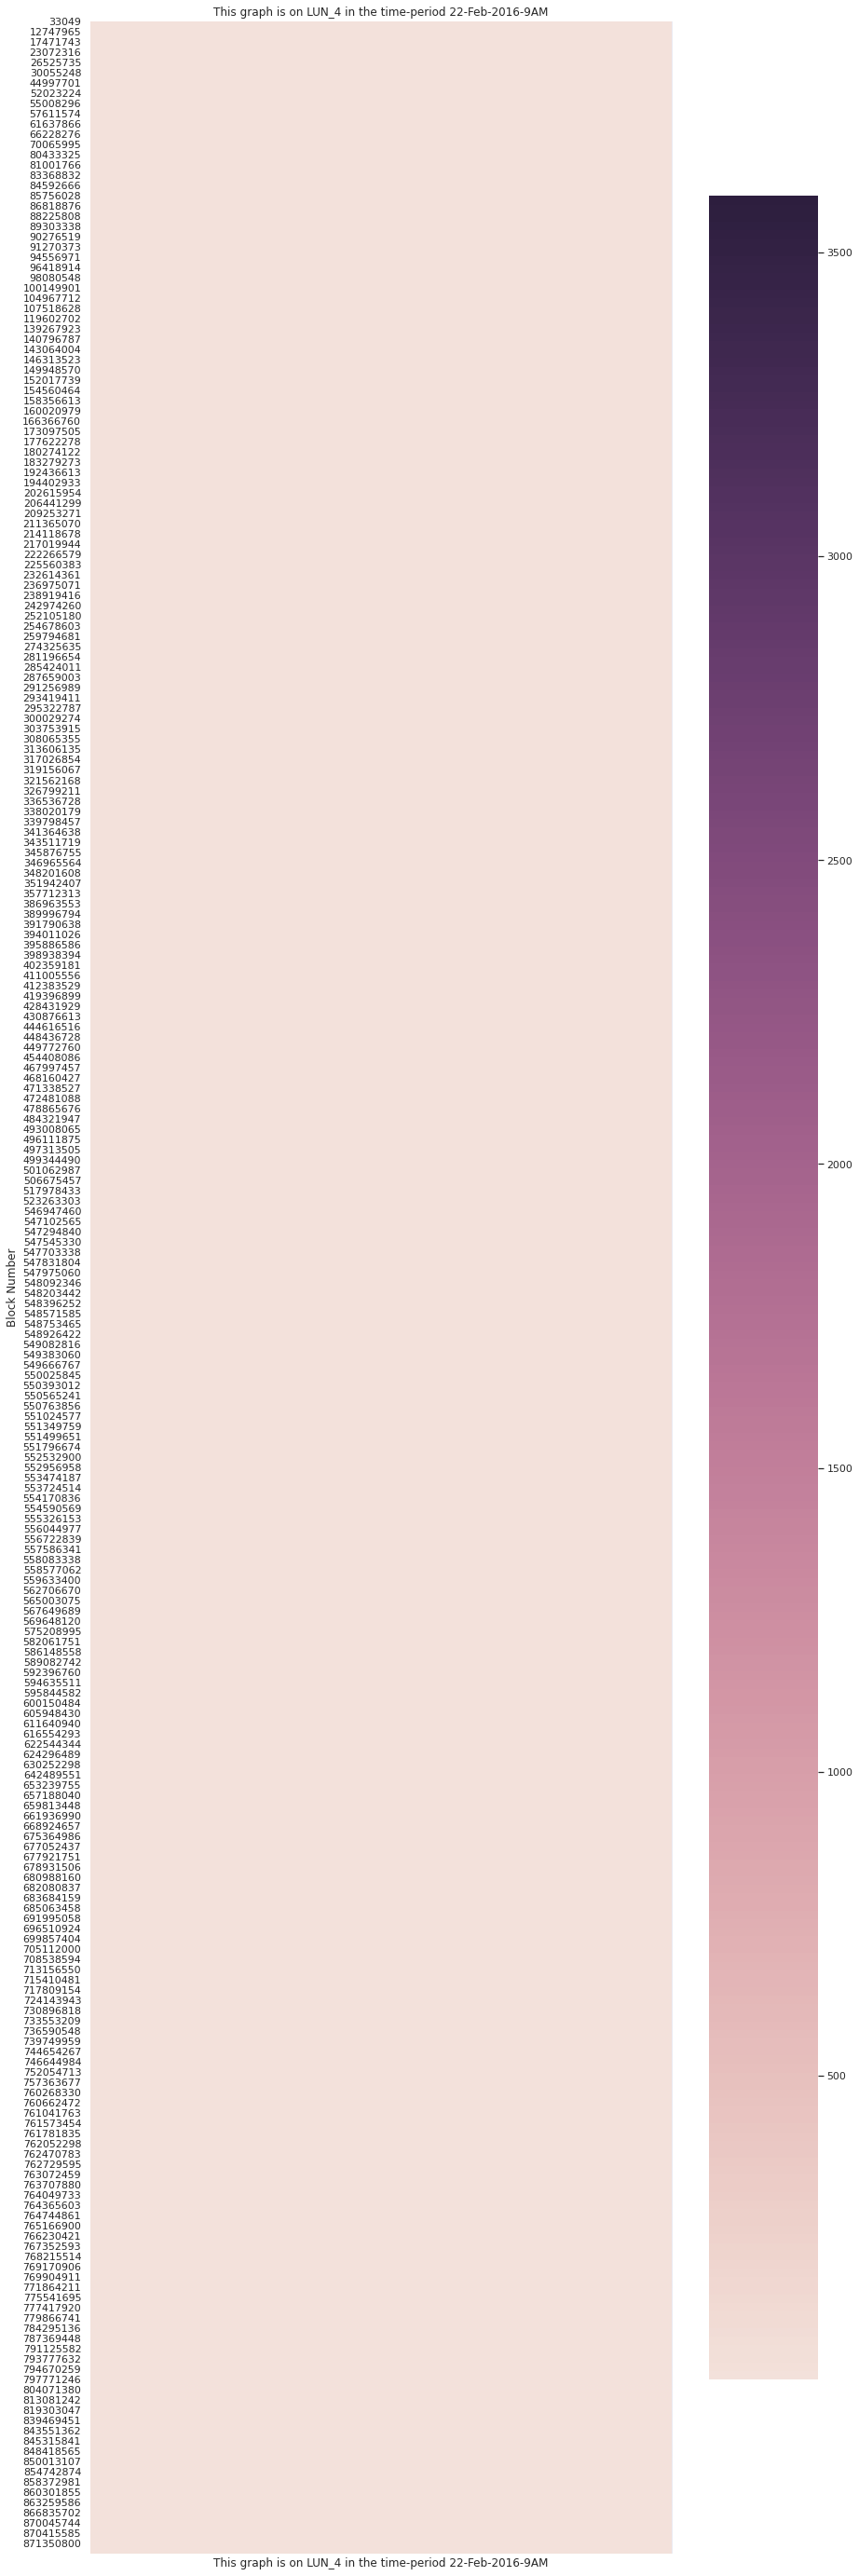

In [6]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_4 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_4 in the time-period 22-Feb-2016-9AM')
plt.show()

In [7]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_5.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_5)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_5)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#97.078

block_range_2000_plus 10
block_range_1000_2000 7
block_range_500_1000 33
block_range_100_500 1085
block_range_50_100 3518
block_range_10_50 73146
block_range_2_10 5332397
block_range_1 20128780
block_range_0 848703665


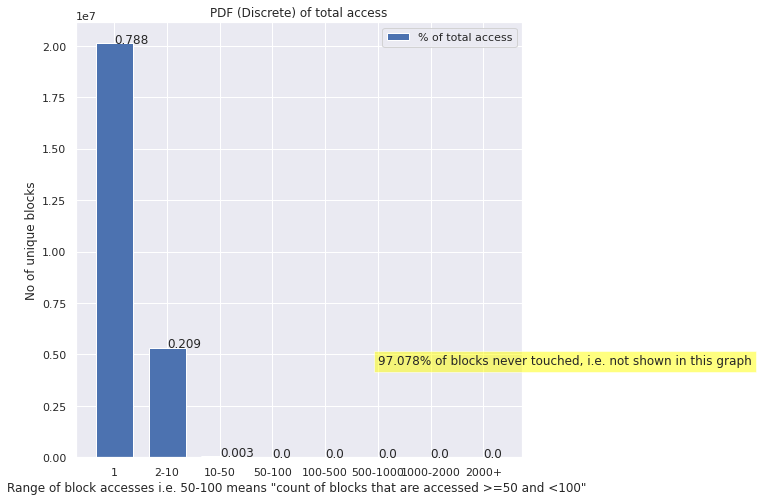

In [8]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "97.078% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_5), 3)), xy=(x_axis[i], y_axis[i]))
   

Text(4, 0.9, '97.078% of blocks never touched, i.e. not shown in this graph')

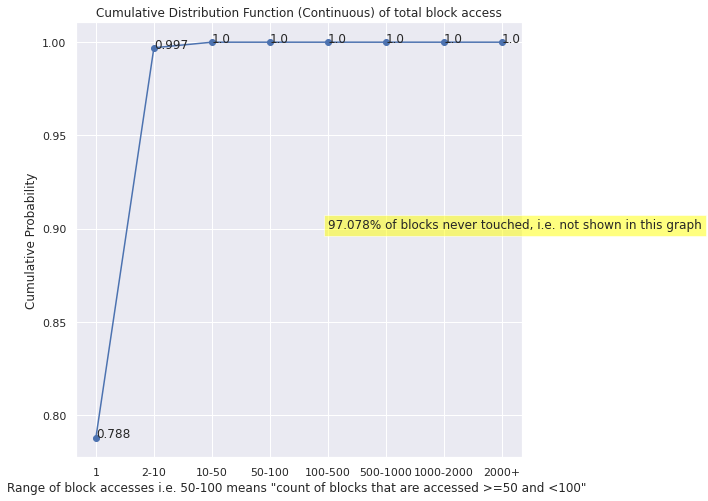

In [9]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_5))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "97.078% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# 9AM VDI Trace (LUN6)

In [35]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('2016022209-LUN6.csv')
# data.head()
data.shape

(4467813, 6)

In [36]:
df2 = pd.DataFrame()
df2[['Offset', 'Size']] = data[['Offset', 'Size']]
df2.shape




(4467813, 2)

In [37]:
df2.to_csv (r'export_dataframe6.csv')


In [15]:
block_counter_dict_6 = count_blocks(data)

print ("Number of blocks accessed", len(block_counter_dict_6))
print ("Sum of all the block accesses", sum(block_counter_dict_6.values()))

sorted_block_counter_dict_6 = collections.OrderedDict(sorted(block_counter_dict_6.items()))


Number of blocks accessed 24098134
Sum of all the block accesses 33341969


In [16]:
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict_6, orient='index')

print(sorted_df)

            0
33048      10
33088      60
34534       1
34535       1
34536       1
...        ..
900364909   2
900364910   2
900364911   2
900364912   2
900364913   2

[24098134 rows x 1 columns]


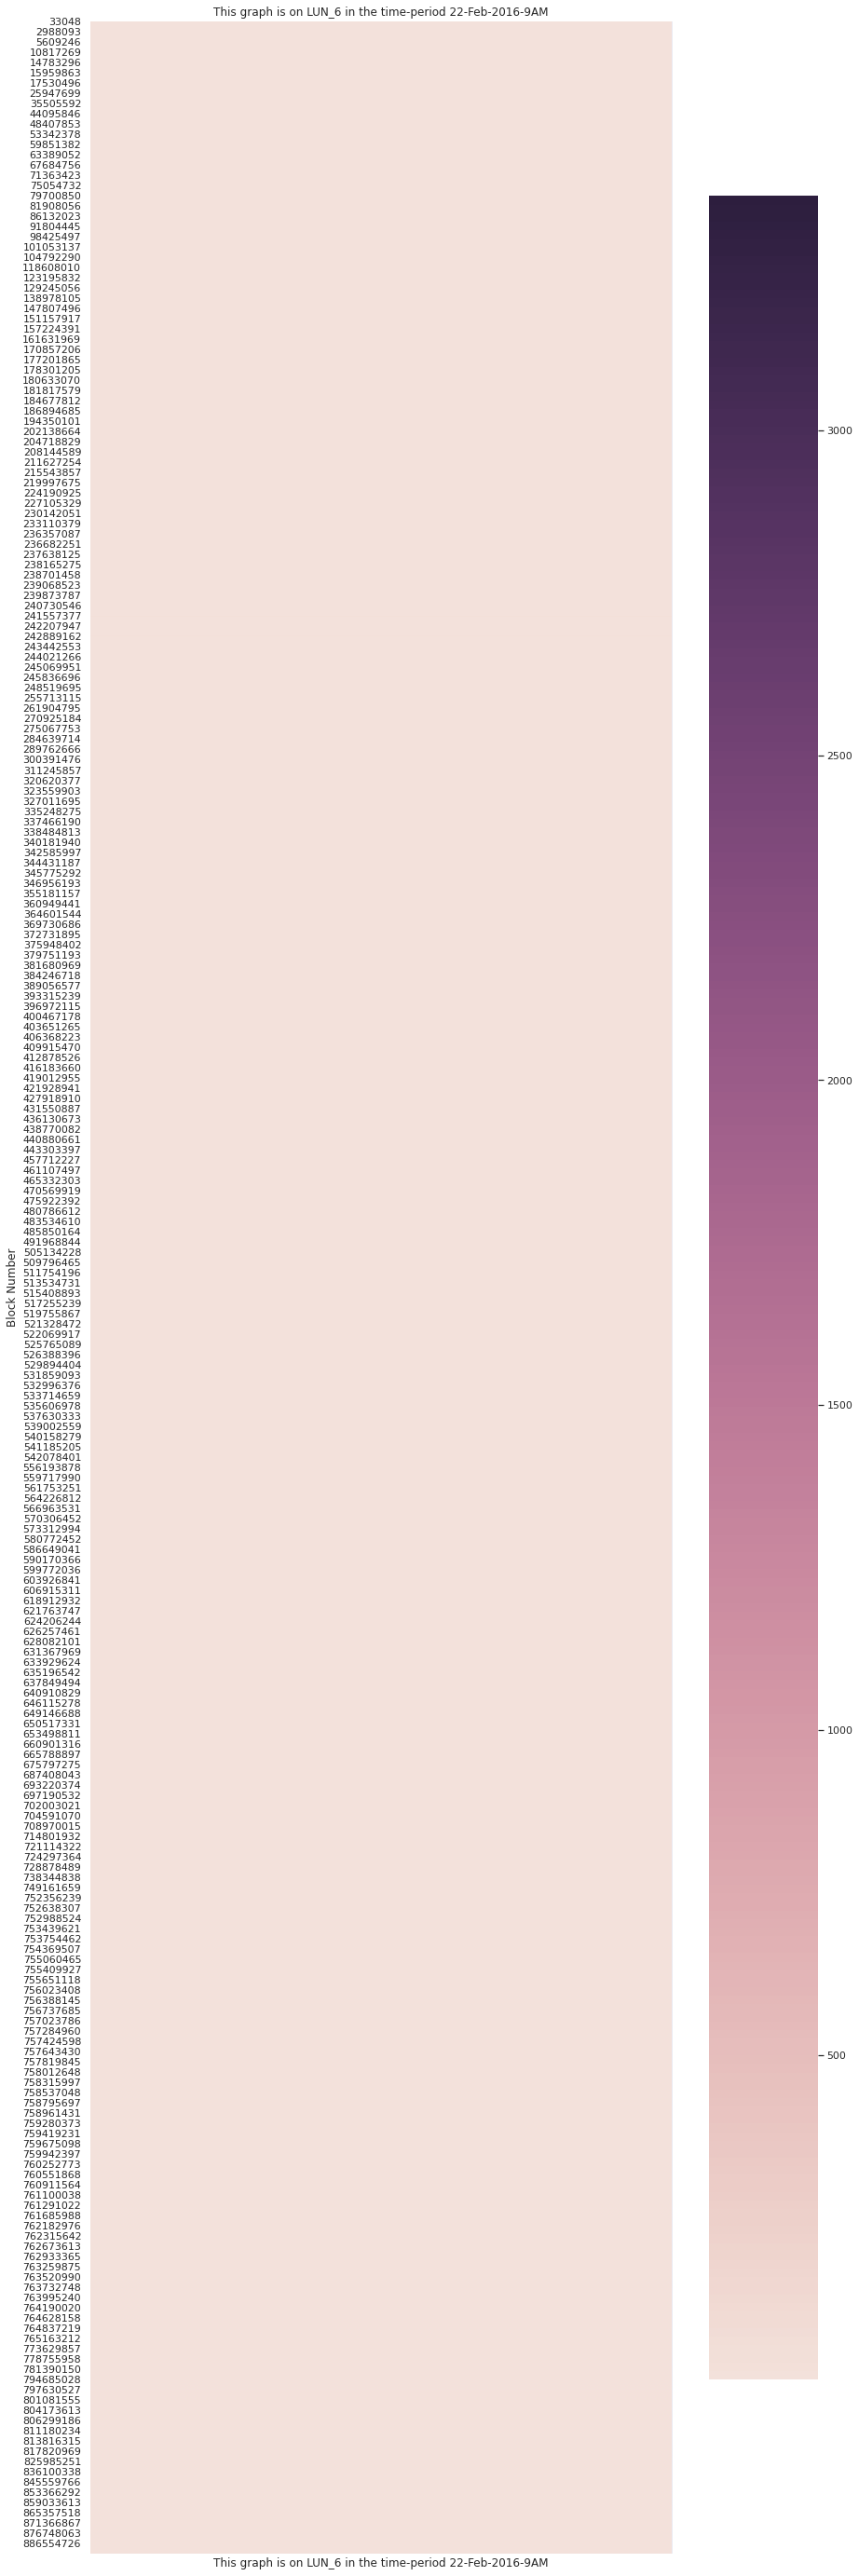

In [17]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_6 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_6 in the time-period 22-Feb-2016-9AM')
plt.show()

In [18]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_6.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_6)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_6)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#97.323

block_range_2000_plus 4
block_range_1000_2000 14
block_range_500_1000 255
block_range_100_500 877
block_range_50_100 4637
block_range_10_50 33952
block_range_2_10 5577961
block_range_1 18480434
block_range_0 876266779


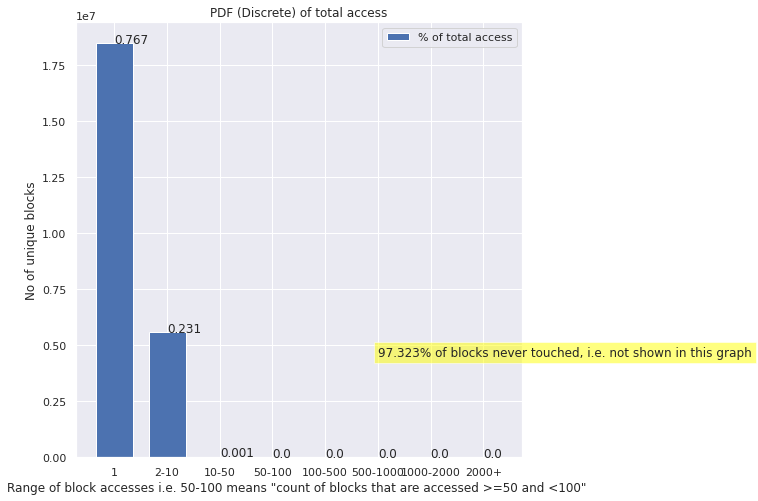

In [20]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 4500000, "97.323% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/len(block_counter_dict_6), 3)), xy=(x_axis[i], y_axis[i]))


Text(4, 0.9, '97.323% of blocks never touched, i.e. not shown in this graph')

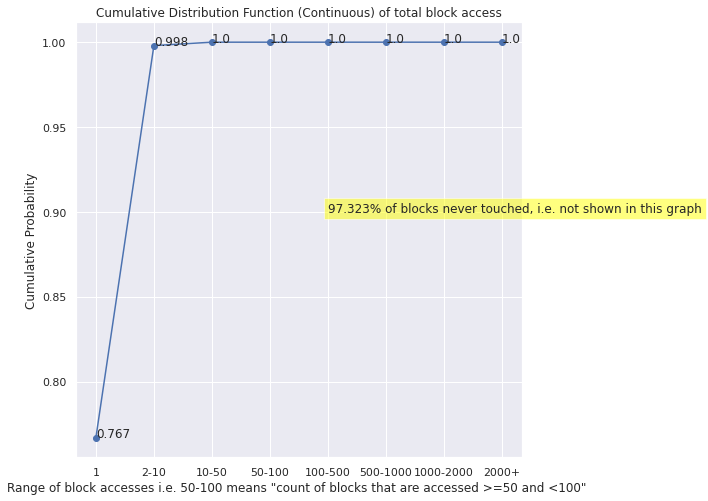

In [21]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import numpy as np

y = ecdf(y_axis, len(block_counter_dict_6))


pyplot.figure(figsize=(8,8))
pyplot.scatter(x=x_axis, y=y)
pyplot.plot(x_axis, y)
for i in range(len(x_axis)):
    pyplot.annotate(str(y[i]), xy=(x_axis[i], y[i]))
# pyplot.legend(loc='upper right')
pyplot.title("Cumulative Distribution Function (Continuous) of total block access")
pyplot.ylabel('Cumulative Probability')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(4, 0.90, "97.323% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))


# All LUNs - load export_dataframe_csv

In [17]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('export_dataframe.csv')
# data.head()
data.shape

(3085094, 3)

In [18]:
data2 = pd.read_csv('export_dataframe2.csv')
# data2.head()
data2.shape

(3613282, 3)

In [19]:
data3 = pd.read_csv('export_dataframe3.csv')
# data2.head()
data3.shape

(4711988, 3)

In [20]:
data4 = pd.read_csv('export_dataframe4.csv')
# data2.head()
data4.shape

(3506508, 3)

In [21]:
data5 = pd.read_csv('export_dataframe5.csv')
# data2.head()
data5.shape

(4478456, 3)

In [22]:
data6 = pd.read_csv('export_dataframe6.csv')
# data2.head()
data6.shape

(4467813, 3)

In [23]:
data_123 = data.append(data2)
data_123 = data_123.append(data3)




data_456 = data4.append(data5)
data_456 = data_456.append(data6)
# data = data.append(data4)
# data = data.append(data5)
# data = data.append(data6)

# data.head()÷
# data.shape
# 23863141 

In [24]:
data_123.shape

(11410364, 3)

In [25]:
data_456.shape

(12452777, 3)

In [37]:
del block_counter_dict_all

# Distribution fucntion export_dataframe_all.csv

In [60]:
data.to_csv (r'export_dataframe_all.csv')


In [22]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('export_dataframe_all.csv')
# data.head()
data.shape

(23863141, 4)

In [38]:
block_counter_dict_all = count_blocks(data_456)

print ("Number of blocks accessed", len(block_counter_dict_all))
print ("Sum of all the block accesses", sum(block_counter_dict_all.values()))

# sorted_block_counter_dict_all = collections.OrderedDict(sorted(block_counter_dict_all.items()))




# 938271 block indexes are common i.e. 1.59%

Number of blocks accessed 67863827
Sum of all the block accesses 96252132


In [43]:
block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_all.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_all)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_all)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#95.486

block_range_2000_plus 18
block_range_1000_2000 37
block_range_500_1000 345
block_range_100_500 3032
block_range_50_100 11721
block_range_10_50 146589
block_range_2_10 16481020
block_range_1 51221065
block_range_0 985044027


In [44]:
# Add data_123 and data_456 block counts





block_range_2000_plus += 22
block_range_1000_2000 += 38
block_range_500_1000 += 98
block_range_100_500 += 3576
block_range_50_100 += 12559
block_range_10_50 += 103840
block_range_2_10 += 15602592
block_range_1 += 43071731
block_range_0 += 1243782736













print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)











# Total accessed blocks - 126658283 (483GB)
# Total disk size - 8.299 TB (no of blocks = 2355485046)
# blocks never accessed - 94.622%

block_range_2000_plus 40
block_range_1000_2000 75
block_range_500_1000 443
block_range_100_500 6608
block_range_50_100 24280
block_range_10_50 250429
block_range_2_10 32083612
block_range_1 94292796
block_range_0 2228826763


In [49]:
number_of_blocks_total_accessed = 126658283





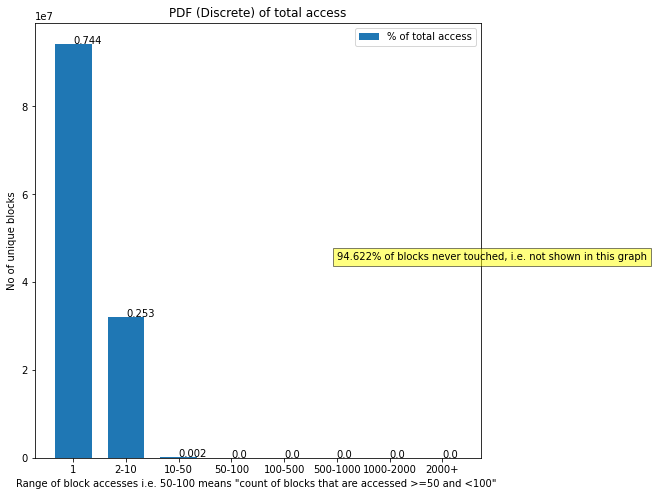

In [50]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(8,8))

x_axis = ["1", "2-10", "10-50", "50-100", "100-500", "500-1000", "1000-2000", "2000+"]

y_axis = [block_range_1, block_range_2_10, block_range_10_50,
          block_range_50_100, block_range_100_500, block_range_500_1000,
          block_range_1000_2000, block_range_2000_plus]

pyplot.bar(x_axis, y_axis, width=0.7, label='% of total access')
# pyplot.bar(x_h, host_read_latency, width=0.7, label='Oasis')
# pyplot.xticks([])
pyplot.legend(loc='upper right')
pyplot.title("PDF (Discrete) of total access")
pyplot.ylabel('No of unique blocks')
pyplot.xlabel('Range of block accesses i.e. 50-100 means "count of blocks that are accessed >=50 and <100" ')
pyplot.text(5, 45000000, "94.622% of blocks never touched, i.e. not shown in this graph", bbox=dict(facecolor='yellow', alpha=0.5))

for i in range(len(x_axis)):
    pyplot.annotate(str(round(y_axis[i]/number_of_blocks_total, 3)), xy=(x_axis[i], y_axis[i]))


In [34]:
# Data_123 Block_Counter Sums - safekeeping







block_range_2000_plus = 0
block_range_1000_2000 = 0
block_range_500_1000 = 0
block_range_100_500 = 0
block_range_50_100 = 0
block_range_10_50 = 0
block_range_2_10 = 0
block_range_1 = 0
block_range_0 = 0


list_block_access_desc = sorted(block_counter_dict_all.values(), reverse=True)

for i in list_block_access_desc:
    if i >= 2000:
        block_range_2000_plus += 1
    elif i >= 1000 and i < 2000:
        block_range_1000_2000 += 1
    elif i >= 500 and i < 1000:
        block_range_500_1000 += 1
    elif i >= 100 and i < 500:
        block_range_100_500 += 1
    elif i >= 50 and i < 100:
        block_range_50_100 += 1
    elif i >=10 and i <= 50:
        block_range_10_50 += 1
    elif i >=2 and i <= 10:
        block_range_2_10 += 1
    elif i == 1:
        block_range_1 += 1
        
total_number_of_blocks = max(block_counter_dict_all)
block_range_0 = (total_number_of_blocks - (len(block_counter_dict_all)))


print("block_range_2000_plus", block_range_2000_plus)
print("block_range_1000_2000", block_range_1000_2000)
print("block_range_500_1000", block_range_500_1000)
print("block_range_100_500", block_range_100_500)
print("block_range_50_100", block_range_50_100)
print("block_range_10_50", block_range_10_50)
print("block_range_2_10", block_range_2_10)
print("block_range_1", block_range_1)
print("block_range_0", block_range_0)

#95.486

block_range_2000_plus 22
block_range_1000_2000 38
block_range_500_1000 98
block_range_100_500 3576
block_range_50_100 12559
block_range_10_50 103840
block_range_2_10 15602592
block_range_1 43071731
block_range_0 1243782736
